# Análises descritivas

Pedro Neto

In [8]:
require("ggplot2")
library(dplyr)
library(data.table)

setwd('/home/pasoneto/Documents/github/eye_tracking_ufabc/Luisiana')

data = fread('treated.csv')
data = data[, 2:ncol(data)]

# Verificando Idade

Idade no pré e no pós

In [9]:
plyr::ddply(data, c('condicao'), summarise,
                   idade = mean(idade_ano, na.rm = TRUE),
                   sd   = sd(idade_ano, na.rm = TRUE))

condicao,idade,sd
<chr>,<dbl>,<dbl>
pos,1.491034,0.1931073
pre,1.285181,0.1866507


# Verificando N

In [10]:
length(unique(data$crianca))

[1] 22

# Verificando presença

Porcentagem de presença geral

In [11]:
mean(data$presenca_pct)

[1] 0.7990909

# Verificando idade

Em anos

In [12]:
mean(data$idade_ano); sd(data$idade_ano)

[1] 1.388107

[1] 0.2159215

# Verificando efeitos

Efeito de tratamento na Bailey

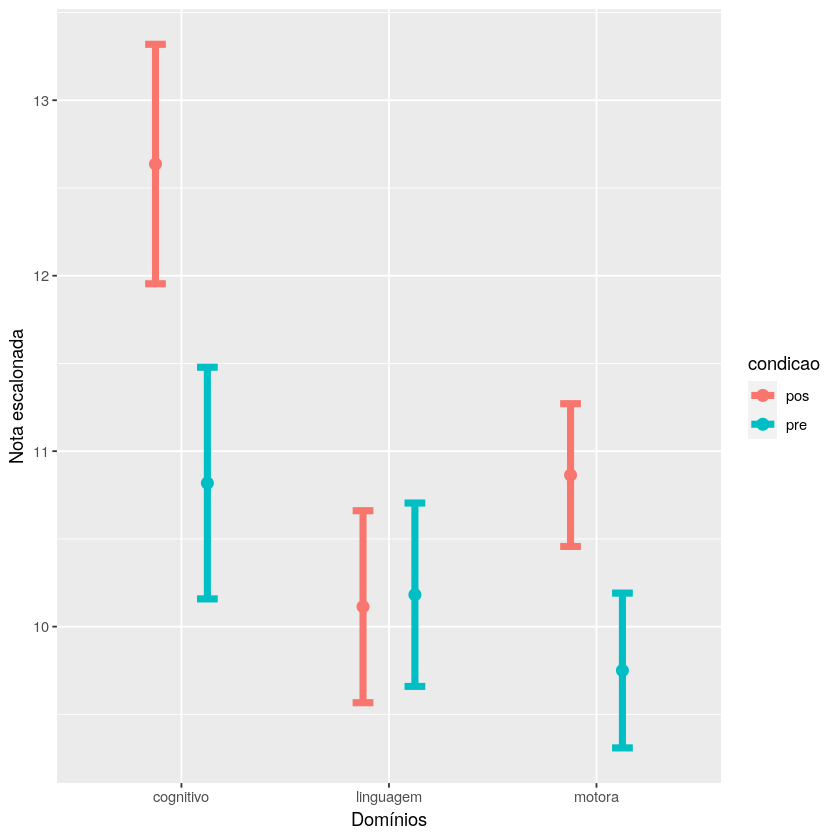

In [6]:
dt = data.frame(score    = data$nota_esc,
                testes   = data$dominio,  
                crianca  = data$crianca,
                condicao = data$condicao,
                geral    = data$teste)

base <- plyr::ddply(dt, c('testes', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score)))

ggplot(dplyr::filter(base, base$geral == 'bailey'), aes(x = testes, y = mean, color = condicao))+
  geom_point(size = 3, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 2, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  xlab("Domínios")+
  ylab("Nota escalonada")

Efeito de tratamento no questionário 1

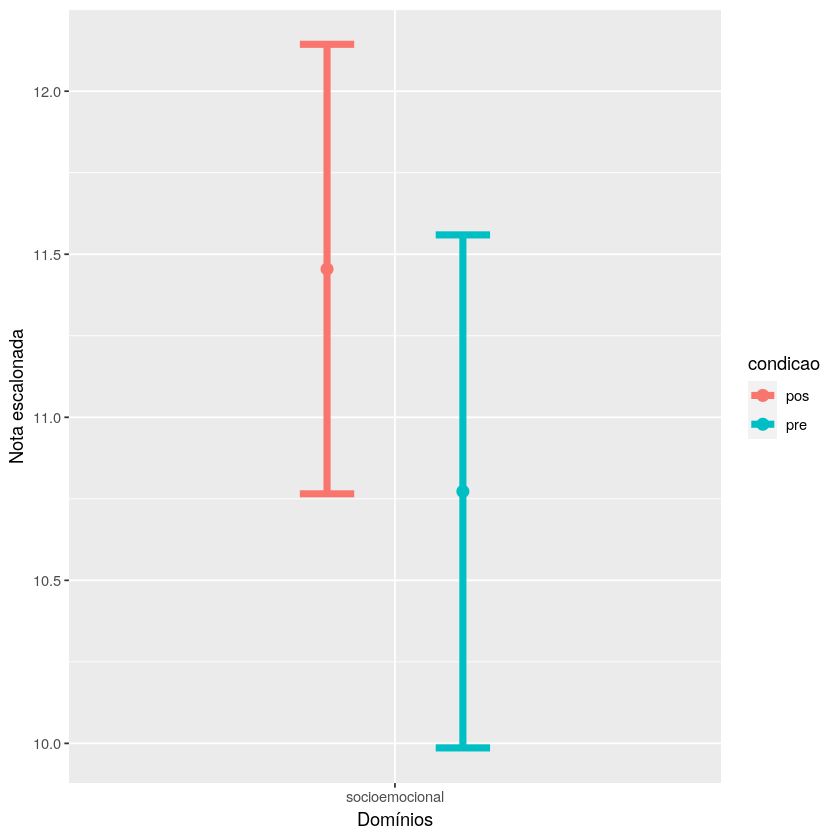

In [7]:
ggplot(dplyr::filter(base, base$geral == 'questionario1'), aes(x = testes, y = mean, color = condicao))+
  geom_point(size = 3, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 2, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  xlab("Domínios")+
  ylab("Nota escalonada")

# Subdomínios

Verificando subdomínio para cada teste global (Bailey, Questionário 1 e Questionário 2)

## Bailey

Bailey por domínio

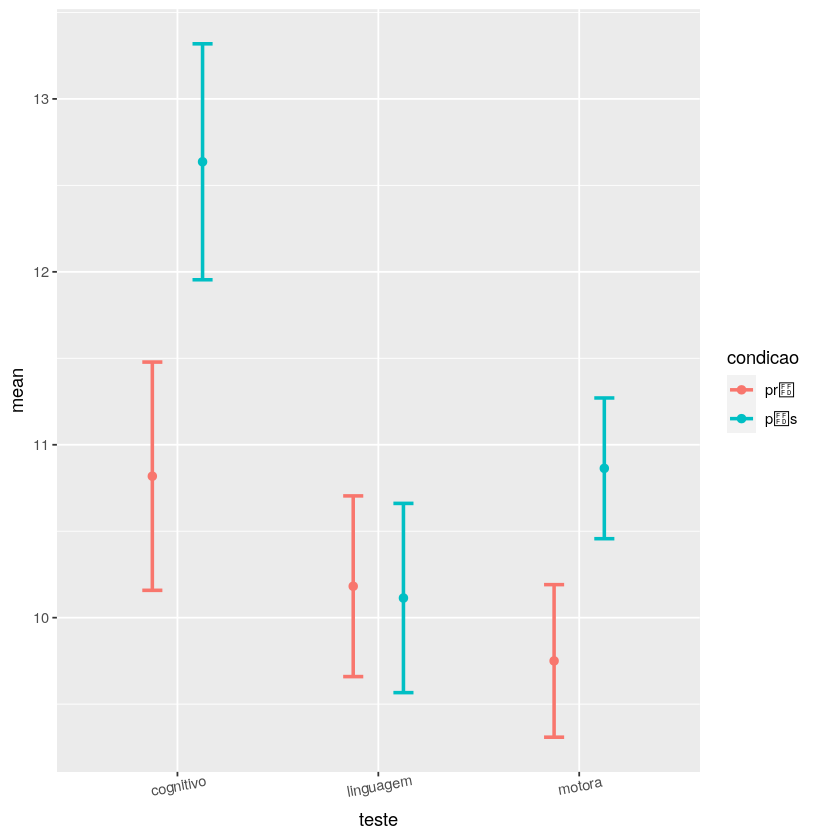

In [8]:
rm(list=ls()) #cleans directory

dt = 
  fread('raw.csv', header = T, encoding = 'UTF-8')

dt = data.frame(score = dt$nota_esc,
                teste = dt$dominio,  
                crianca = dt$crianca,
                condicao = dt$condicao,
                geral = dt$teste
               )

base <- plyr::ddply(dt, c('teste', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score))
                    )

ggplot(dplyr::filter(base, base$geral == 'bailey'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  theme(axis.text.x = element_text(angle = 10))

## Bailey
Bailey por subdomínio

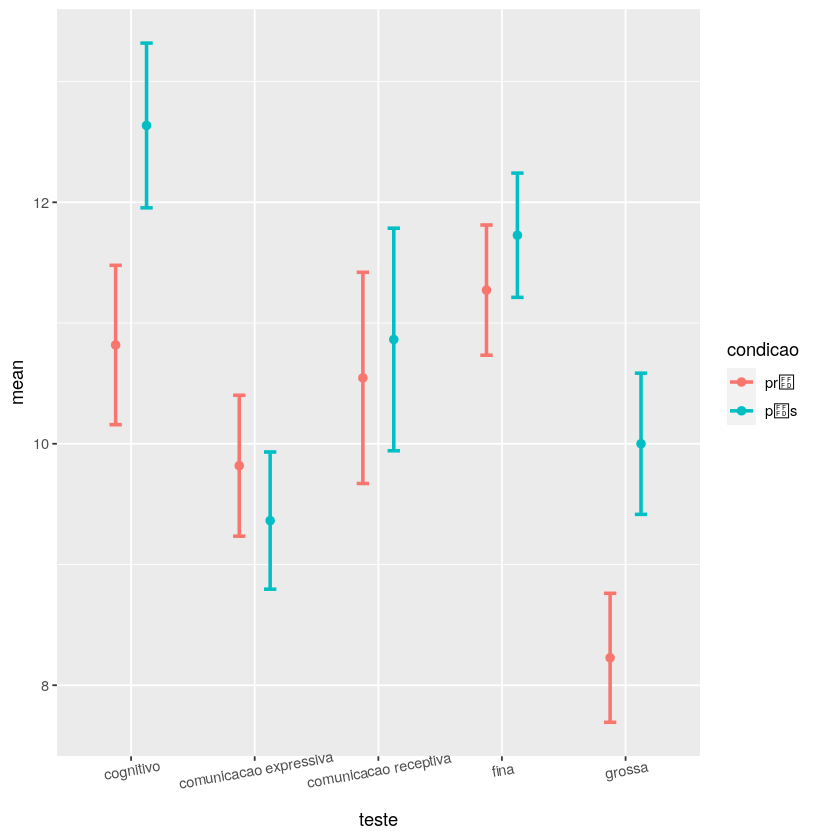

In [7]:
rm(list=ls()) #cleans directory

dt = fread('raw.csv', header = T, encoding = 'UTF-8')

dt = data.frame(score = dt$nota_esc,
                teste = dt$subteste,  
                crianca = dt$crianca,
                condicao = dt$condicao,
                geral = dt$teste)

base <- plyr::ddply(dt, c('teste', "condicao", "geral"), summarise,
                    mean = mean(score, na.rm = TRUE),
                    sd   = sd(score, na.rm = TRUE),
                    se = sd/sqrt(length(score)))

ggplot(dplyr::filter(base, base$geral == 'bailey'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  theme(axis.text.x = element_text(angle = 10))

## Questionário 1

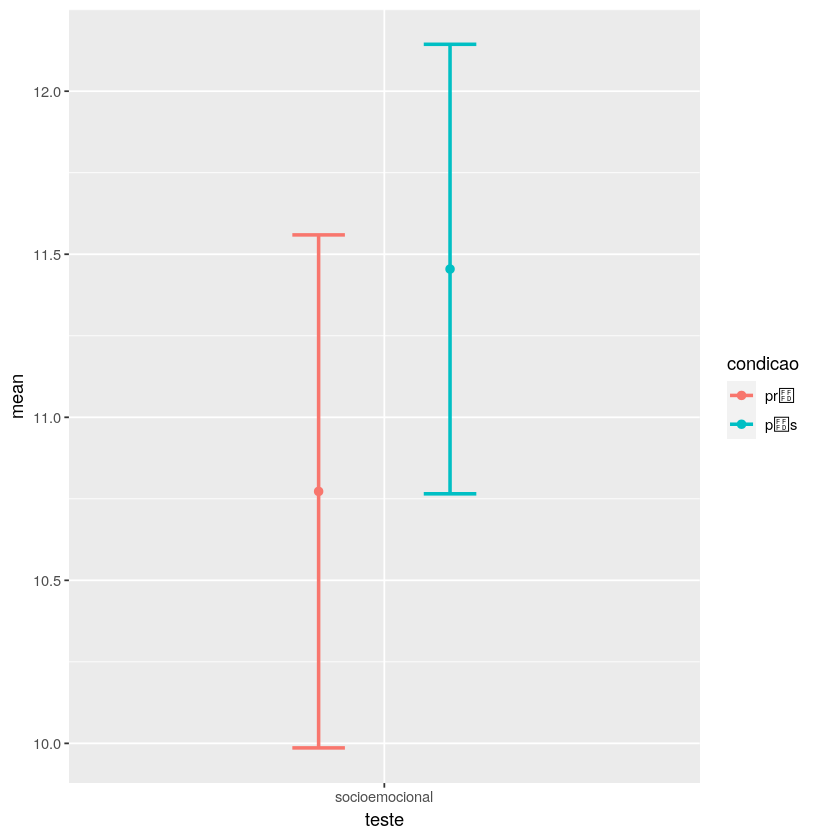

In [10]:
ggplot(dplyr::filter(base, base$geral == 'questionario1'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), width = 0.2, position = position_dodge(width = 0.5))

## Questionário 2

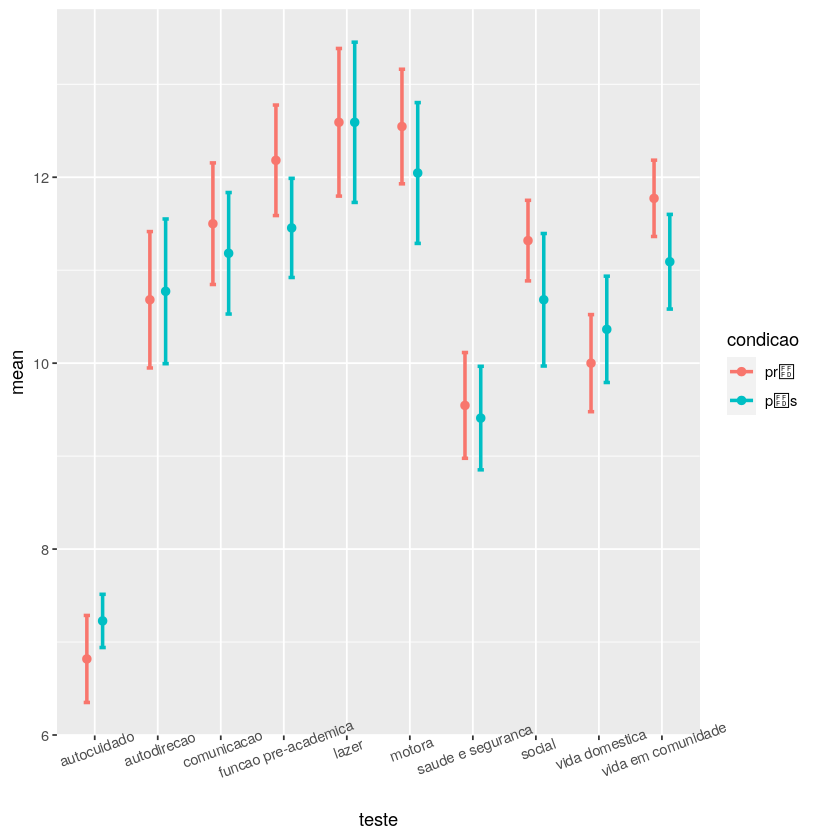

In [11]:
ggplot(dplyr::filter(base, base$geral == 'questionario2'), aes(x = teste, y = mean, color = condicao))+
  geom_point(size = 2, position = position_dodge(width = 0.5))+
  geom_errorbar(size = 1, aes(ymin = mean - se, ymax = mean + se), 
                width = 0.2, position = position_dodge(width = 0.5))+
  theme(axis.text.x = element_text(angle = 20))

# Outliers
limite inferior  Q1−IQR∗1.5 \
limite superior  Q3+IQR∗1.5

In [37]:
#s is a unidimentional numerical vector. Tags outliers.
out_detector = function(s){
        li = quantile(s)[2] - IQR(s)*1.5; ls = quantile(s)[4] + IQR(s)*1.5; f = c()      
        for(i in 1:length(s)){         
            if( (s[i] > li) && (s[i] < ls)) {   f[[i]] = 0   }
            if(s[i] <= li)                  {   f[[i]] = 1  }
            if(s[i] >= ls)                  {   f[[i]] = 2 }           
            }
        return(f)
    }

# Outliers

Outliers foram identificados como aqueles que obtiveram uma score 1.5 intervalos interquatis acima ou abaixo do primeiro e do terceiro quartil, respectivamente. A análise de outliers foi feita para cada domínio do questionário 1, questionário 2 e do Bailey, apenas para a condição pré-intervenção.

Visualização abaixo

In [55]:
#rm(list=ls()) #cleans directory

# data = fread('treated.csv')
# data = data[, 3:ncol(data)]

# here i'm summarizing for 'grande área', because the dominio motor, por exemplo
# tinha o grosso e o fino. Eu queria a média deles para fazera a análise do outlier.
# data = plyr::ddply(data, c('crianca', "dominio", "condicao"), summarise,
#                    nota_esc = mean(nota_esc, na.rm = TRUE))
#OUTPUT GOES INTO THE ALREADY SAVED out.csv file:

#data = plyr::ddply(data, c('crianca', "dominio", "condicao"), summarise,
#                    nota_esc = mean(nota_esc, na.rm = TRUE))

#write.csv(data, "out.csv")

# data = fread("out.csv")

# # computing outliers by condition (pré - pós) and domínio
# data = data[, outliers := out_detector(nota_esc), by = .(dominio, condicao)]

# write.csv(data, "out.csv")

In [73]:
#This data frame tells me if the chld is 
# an outlier in either the pre/post and in each subtest
# out = fread("out.csv")[, 3:7]
# data = fread("treated.csv")[, 3:19]

# #now I need to harvest this information and insert it in the previous dataset, named data
# #for that I use merge.
# data = merge(  x = data, y = out, 
#                by.x = c("crianca", "dominio", "condicao"), 
#                by.y = c("crianca", "dominio", "condicao")
#             )
# write.csv(data, "treated_candidate.csv")

# Outliers identifyed

Refazendo análises sem outliers

In [90]:
data = fread("treated.csv")
data = dplyr::filter(data, data$outliers == 0)